# DATA PREPARATION

In [1]:
import pandas as pd
heart_dataset:pd.DataFrame = pd.read_csv("~/git/thesis_thallasemia/heartv1.csv", header=0)
df:pd.DataFrame = heart_dataset.copy()

# renamed the headers(target to "heart disease diagnosis(old target)" and thal to "target(thal)")
df.rename(columns={
	'target': 'heart disease diagnosis',
	'thal': 'target(thal)',
	'sex': 'is_male'
}, inplace=True)

# Map sex to binary
df['is_male'] = df['is_male'].map({'male': 1, 'female': 0})

# Drop rows with missing values if any
df.dropna(inplace=True)

# Define features and target
x:pd.DataFrame = df.drop(columns=['target(thal)'])  #used to predict column
y:pd.Series = df['target(thal)']  #target column

# training and testing split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# FEATURE IMPORTANCE
### RANDOM FOREST TRAINING & DETAILS

In [2]:
from sklearn.ensemble import RandomForestClassifier

# initialized the classifier object
model_rf:RandomForestClassifier = RandomForestClassifier(random_state=42)
# trains the classifier object with the training data
model_rf.fit(x_train, y_train)

# Get feature importance
feature_importance_df: pd.DataFrame = pd.DataFrame({
    'feature': model_rf.feature_names_in_,
    'importance': model_rf.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance_df

,feature,importance
13,Heart Disease Risnume,0.120602
9,oldpeak,0.104883
14,heart disease diagnosis,0.099129
7,thalach,0.094688
4,chol,0.093843
3,resting_BP,0.087437
12,Max Heart Rate Reserve,0.086227
1,age,0.078456
2,cp,0.054921
0,is_male,0.053685


### DECISION TREES TRAINING & DETAILS

In [3]:
from sklearn.tree import DecisionTreeClassifier

# initialized the classifier object
model_dt:DecisionTreeClassifier = DecisionTreeClassifier(random_state=42)
# trains the classifier object with the training data
model_dt.fit(x_train, y_train)

# Get feature importance
feature_importance_dt: pd.DataFrame = pd.DataFrame({
    'feature': model_dt.feature_names_in_,
    'importance': model_dt.feature_importances_
}).sort_values(by='importance', ascending=False)

feature_importance_dt

,feature,importance
14,heart disease diagnosis,0.209875
13,Heart Disease Risnume,0.129596
4,chol,0.114734
12,Max Heart Rate Reserve,0.107855
7,thalach,0.104914
9,oldpeak,0.101584
1,age,0.062238
3,resting_BP,0.054817
0,is_male,0.036372
11,ca,0.033122


# SHAPLEY VALUES

In [4]:
import shap
import numpy as np

shap.initjs()

# Create a SHAP explainer for the trained RandomForest model
rf_explainer = shap.TreeExplainer(model_rf)
rf_shap_values = rf_explainer(x)
print(np.shape(rf_shap_values.values))

dt_explainer = shap.TreeExplainer(model_dt)
dt_shap_values = rf_explainer(x)
print(np.shape(dt_shap_values.values))



/home/jules/venv_shap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1035, 15, 4)
(1035, 15, 4)


## FORCE/WATERFALL PLOTS RANDOM FOREST

In [5]:
# change "force" to "waterfall" to see the waterfall graph 
display(shap.plots.force(rf_shap_values[0,:,0]))
display(shap.plots.force(rf_shap_values[0,:,1]))
display(shap.plots.force(rf_shap_values[0,:,2]))
display(shap.plots.force(rf_shap_values[0,:,3]))

## FORCE/WATERFALL PLOTS DECISION TREES

In [6]:
# change "force" to "waterfall" to see the waterfall graph 
display(shap.plots.force(dt_shap_values[0,:,0]))
display(shap.plots.force(dt_shap_values[0,:,1]))
display(shap.plots.force(dt_shap_values[0,:,2]))
display(shap.plots.force(dt_shap_values[0,:,3]))

## FORCE/WATERFALL PLOTS CONCLUSION
the rf shap values are the same as 
the counterpart df shap values 

## ABSOLUTE MEAN SHAP

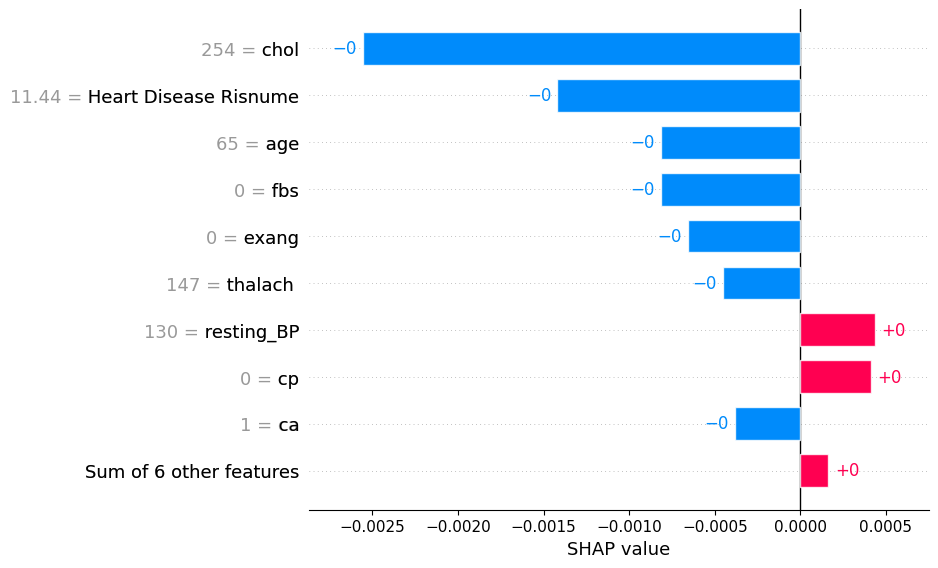

None

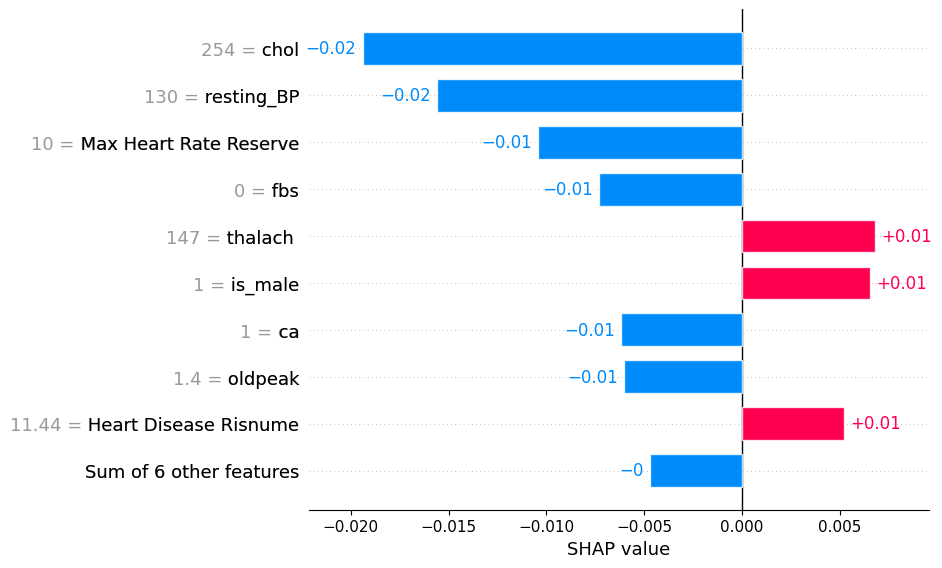

None

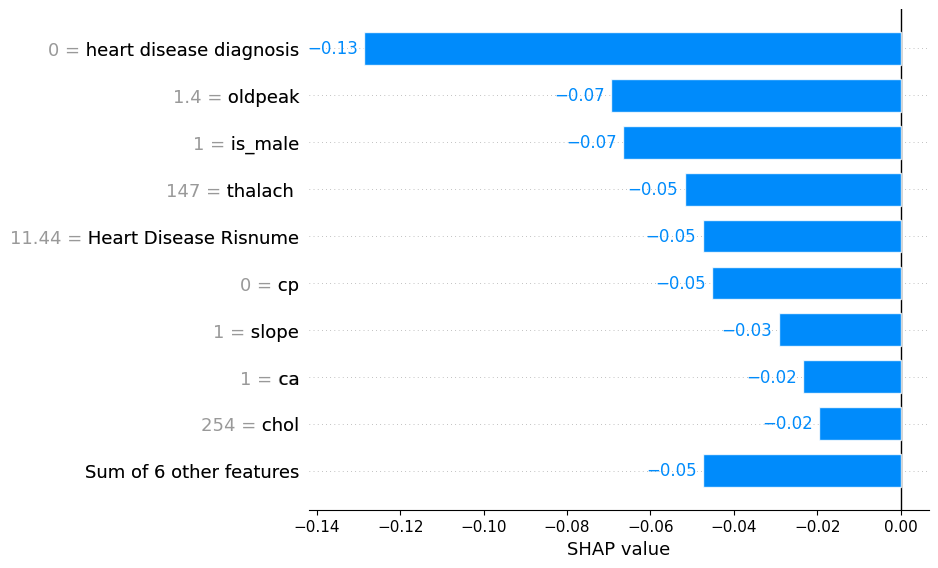

None

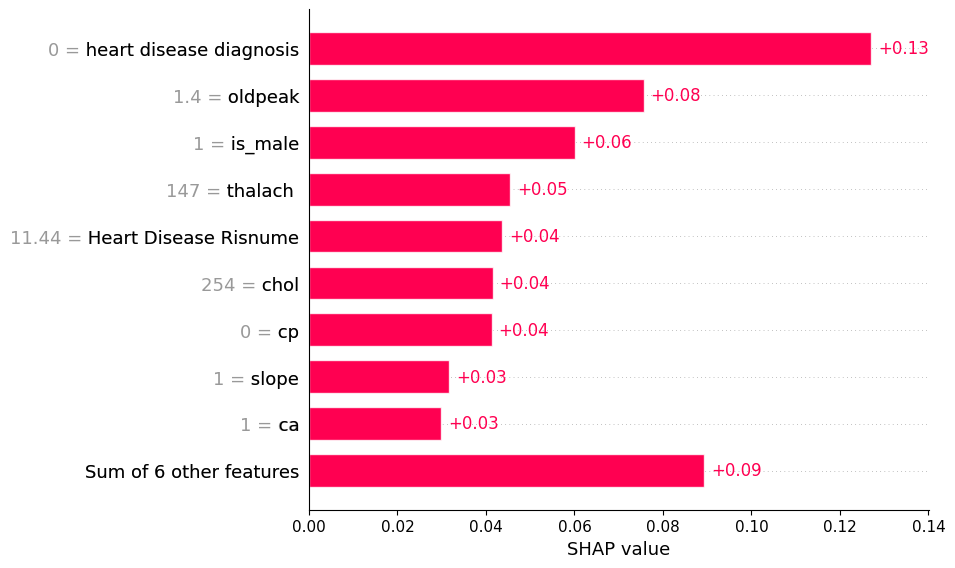

None

In [7]:
display(shap.plots.bar(rf_shap_values[0,:,0]))
display(shap.plots.bar(rf_shap_values[0,:,1]))
display(shap.plots.bar(rf_shap_values[0,:,2]))
display(shap.plots.bar(rf_shap_values[0,:,3]))

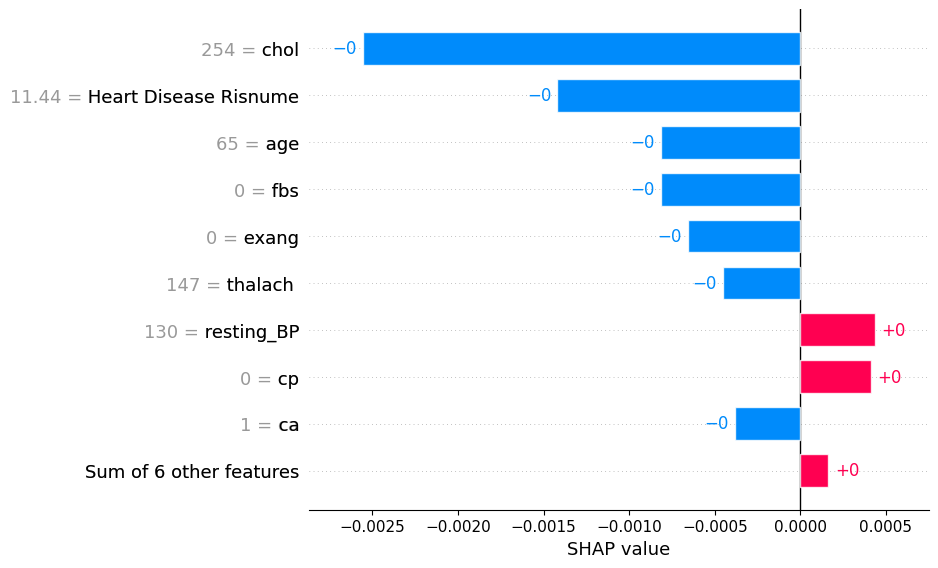

None

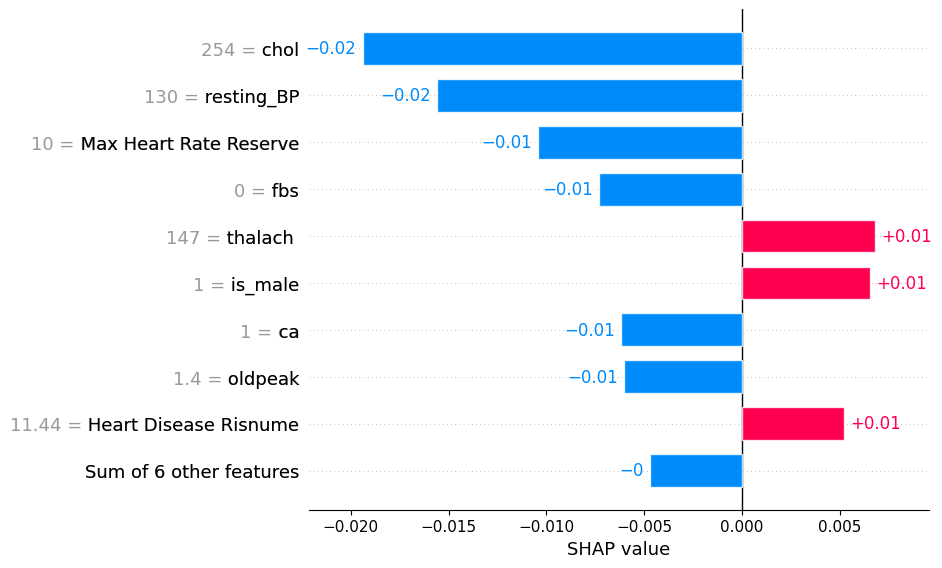

None

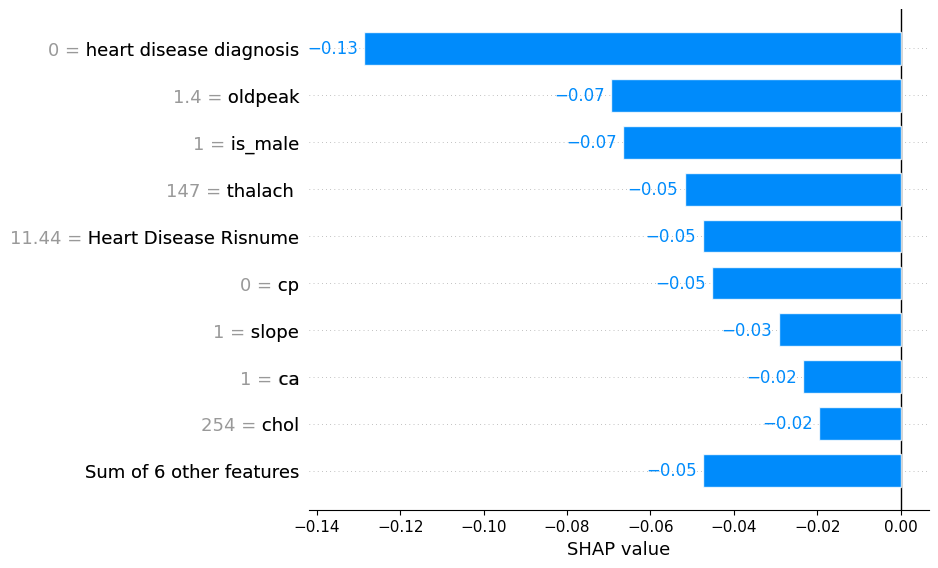

None

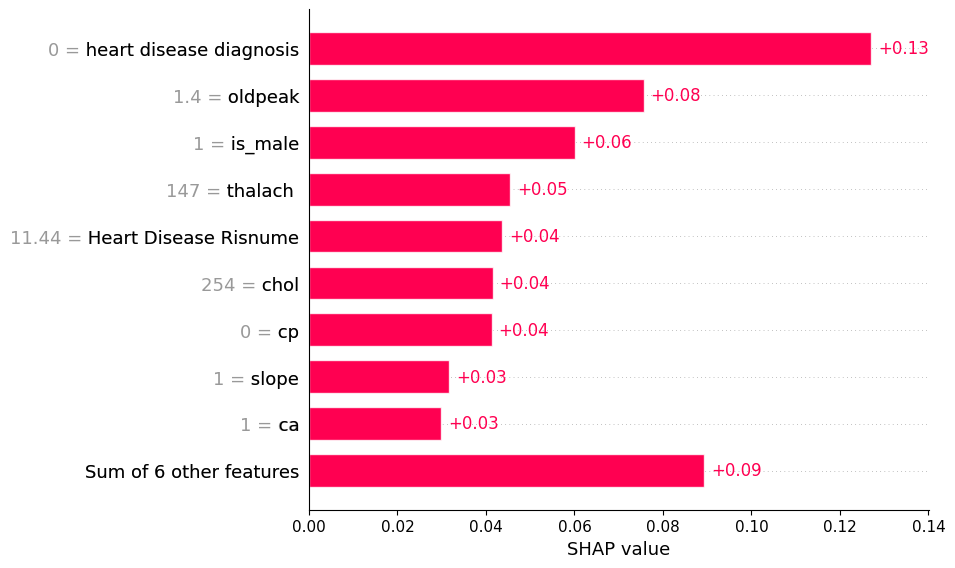

None

In [8]:

display(shap.plots.bar(dt_shap_values[0,:,0]))
display(shap.plots.bar(dt_shap_values[0,:,1]))
display(shap.plots.bar(dt_shap_values[0,:,2]))
display(shap.plots.bar(dt_shap_values[0,:,3]))

## ABSOLUTE MEAN SHAP CONCLUSION

i have no idea what im looking at

## BEESWARM PLOTS

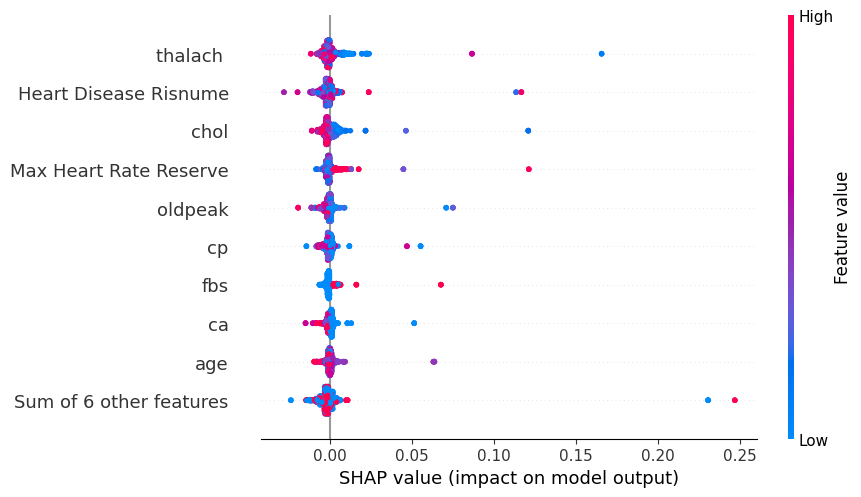

None

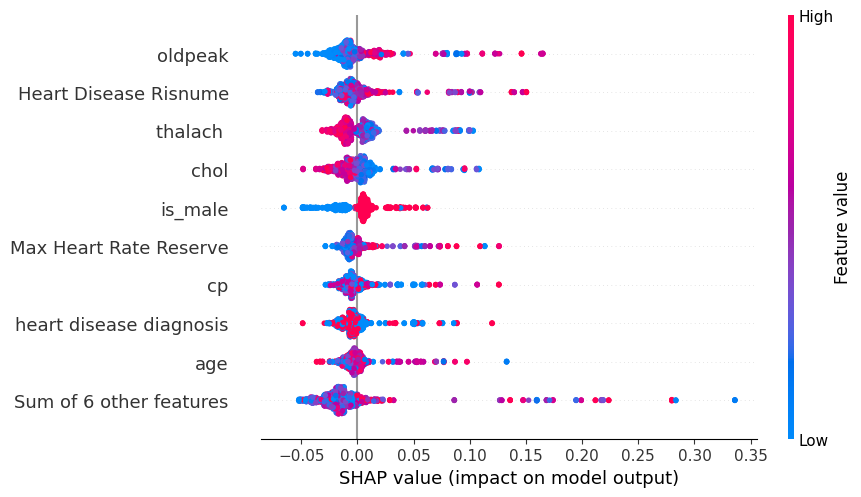

None

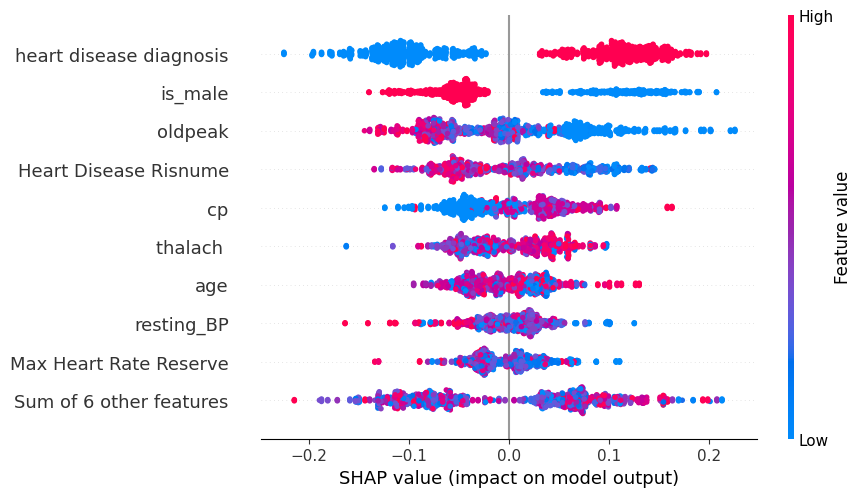

None

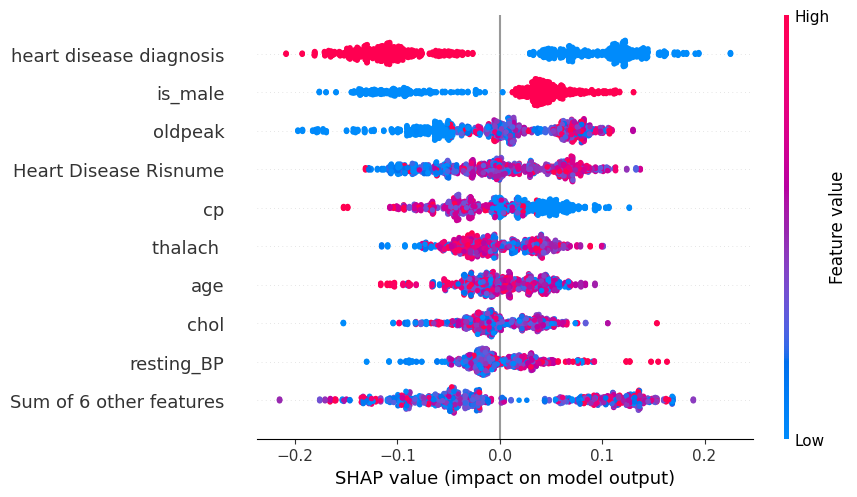

None

In [11]:
display(shap.plots.beeswarm(rf_shap_values[:, :, 0]))
display(shap.plots.beeswarm(rf_shap_values[:, :, 1]))
display(shap.plots.beeswarm(rf_shap_values[:, :, 2]))
display(shap.plots.beeswarm(rf_shap_values[:, :, 3]))

## BEESWARM PLOTS CONCLUSION
I have no idea what im looking at